In [1]:
import cv2
import matplotlib.pyplot as plt
import helpers
import numpy as np
import tensorflow as tf
import glob
import random
import matplotlib.patches as patches
import pickle

In [2]:
class maskResult:
    def __init__(self, vals, prediction):
        self.vals = vals
        self.prediction = prediction

In [3]:
file_coord = open('cropCoordinates', 'rb') 
cropCoordinates = pickle.load(file_coord);
file_cropImages = open('cropImages', 'rb')
cropImages = pickle.load(file_cropImages);
file_maskPredict = open('maskPrediction', 'rb')
maskPredictions = pickle.load(file_maskPredict);
file_imgs = open('imgs_with_labels', 'rb')
imgs_with_labels = pickle.load(file_imgs)

## Displaying Sample Image

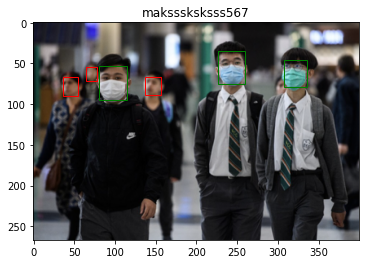

In [46]:
img_index = 427 #Value between 0 and 852 inclusive

img_name, img_data = list(imgs_with_labels['raw_data'].items())[img_index]
img = np.copy(img_data['img'])
img = helpers.to_rgb(img)

fig,ax = plt.subplots(1)
ax.imshow(img)
plt.title(img_name)

#Draw a box around each face
j = 0
for coord in cropCoordinates[img_index]:
    maskval = maskPredictions[img_index][j].vals[0][1]
    if maskval< 0.3:
        color = 'green'
    elif maskval < 0.5:
        color = 'yellow'
    elif maskval < 0.7:
        color = 'orange'
    else:
        color = 'red'
    rect = patches.Rectangle((coord['x1'],coord['y1']),(coord['x2']-coord['x1']),(coord['y2']-coord['y1']),linewidth=1,edgecolor=color,facecolor='none')
    ax.add_patch(rect)
    j = j+1
    
plt.show()

